In [98]:
import pandas as pd

In [99]:
path = '/content/drive/MyDrive/ML projects/Logistic/archive (5)/application_record.csv'
path2 = '/content/drive/MyDrive/ML projects/Logistic/archive (5)/credit_record.csv'

In [100]:
data1 = pd.read_csv(path)
data2 = pd.read_csv(path2)

In [101]:
data1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [102]:
data1.isnull().sum()
data2.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [103]:
data1 = data1.dropna()

In [104]:
data1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [105]:
print(data1['CODE_GENDER'].unique())
print(data1['NAME_EDUCATION_TYPE'].unique())

['M' 'F']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [106]:
print(data1.shape,data2.shape)

(304354, 18) (1048575, 3)


In [107]:
print(data2['STATUS'].unique())

['X' '0' 'C' '1' '2' '3' '4' '5']


In [108]:
import numpy as np
data2.STATUS = data2.STATUS.replace(['C','X'],0)
data2.STATUS = data2.STATUS.apply(pd.to_numeric)
data2.STATUS = np.where(data2.STATUS<1,0,1)
print(data2['STATUS'].unique())

[0 1]


In [109]:
maindata = pd.merge(data1,data2,on = 'ID')
maindata.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,0
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,0
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,0


In [110]:
maindata = maindata.drop_duplicates('ID',keep = 'first')
maindata.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
30,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0


In [111]:
maindata = maindata.drop(['CNT_CHILDREN','FLAG_WORK_PHONE'], axis=1)

In [112]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [113]:
maindata['CODE_GENDER'] = LE.fit_transform(maindata['CODE_GENDER'])
maindata['FLAG_OWN_CAR'] = LE.fit_transform(maindata['FLAG_OWN_CAR'])
maindata['FLAG_OWN_REALTY'] = LE.fit_transform(maindata['FLAG_OWN_REALTY'])
maindata['NAME_INCOME_TYPE'] = LE.fit_transform(maindata['NAME_INCOME_TYPE'])
maindata['NAME_EDUCATION_TYPE'] = LE.fit_transform(maindata['NAME_EDUCATION_TYPE'])
maindata['NAME_FAMILY_STATUS'] = LE.fit_transform(maindata['NAME_FAMILY_STATUS'])
maindata['NAME_HOUSING_TYPE'] = LE.fit_transform(maindata['NAME_HOUSING_TYPE'])
maindata['OCCUPATION_TYPE'] = LE.fit_transform(maindata['OCCUPATION_TYPE'])


In [114]:
maindata.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008806,1,1,1,112500.0,4,4,1,1,-21474,-1134,1,0,0,16,2.0,0,0
30,5008808,0,0,1,270000.0,0,4,3,1,-19110,-3051,1,1,1,14,1.0,0,0


In [115]:
maindata = maindata.drop(['ID'],axis=1)

In [116]:
maindata.shape

(25134, 17)

In [117]:
feature = maindata.iloc[:,0:15]
label = maindata.iloc[:,16]

In [118]:
from sklearn.model_selection import train_test_split
trainF,testF,trainL,testL = train_test_split(feature,label,test_size=.3)

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)

In [120]:
model.fit(trainF,trainL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
pred = model.predict(testF)

In [122]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [123]:
model.classes_

array([0, 1])

In [124]:
report = classification_report(testL,pred,target_names=['0','1'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7449
           1       0.00      0.00      0.00        92

    accuracy                           0.99      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.98      0.99      0.98      7541



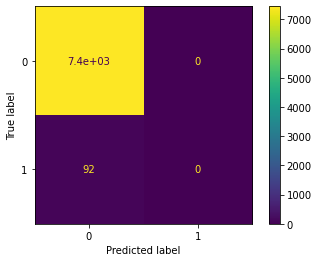

In [126]:
plot_confusion_matrix(model,testF,testL)

In [139]:
print(len(maindata['STATUS'] != 0))

25134


In [138]:
print(len(maindata['STATUS'] == 0))

25134


In [151]:
x = 0
for i in testL:
  if i ==1:
    x=x+1

In [154]:
cleaneddata = maindata
cleaneddata.head(1)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,112500.0,4,4,1,1,-21474,-1134,1,0,0,16,2.0,0,0


In [155]:
cleaneddata = cleaneddata.drop(['CODE_GENDER','FLAG_MOBIL','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS'],axis=1)

In [156]:
model2 = LogisticRegression(max_iter=1000)

In [157]:
cleaneddata.shape

(25134, 12)

In [160]:
trainF,testF,trainL,testL = train_test_split(cleaneddata.iloc[:,0:10],cleaneddata.iloc[:,11],test_size=.3)

In [161]:
model2.fit(trainF,trainL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
pred = model2.predict(testF)

In [163]:
print(classification_report(testL,pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7455
           1       0.00      0.00      0.00        86

    accuracy                           0.99      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.98      0.99      0.98      7541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


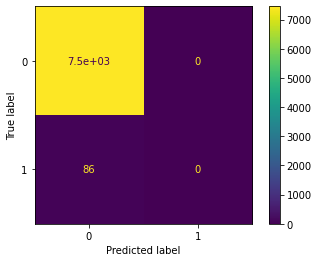

In [164]:
plot_confusion_matrix(model2,testF,testL)